# Machine Learning with a Heart
Welcome to my notebook for the DrivenData [Machine Learning with a Heart](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/) competition!

## Load data
Let's begin by loading in the data.  I'll be merging the training values and labels into a single dataframe as they come separated.

In [1]:
import pandas as pd

# Merge training data into a single dataframe.
train_values = pd.read_csv('./data/train-values.csv')
train_labels = pd.read_csv('./data/train-labels.csv')
train = train_values.merge(train_labels, on='patient_id')

# Load test data (has no labels, obviously).
test = pd.read_csv('./data/test-values.csv')

## Data summary
Let's begin by looking at a summary of our data.  What are the ranges? Does it have any invalid or missing values? Are there any obvious outliers? What's the distribution of data?  These kind of things.

### Missing values
Luckily, there is no missing data!

In [2]:
print('Null train rows:', sum(train.isnull().any(1)))
print('Null test rows:', sum(test.isnull().any(1)))

Null train rows: 0
Null test rows: 0


### Summary statistics
Looking at the mean values for each column in both datasets shows that they are similar. This means that our test data likely has no obvious deviations and is similar enough to the train data.  The ranges on all of the values look reasonable, given my (limited) knowledge of heart conditions.

In [3]:
train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [4]:
test.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.655556,131.411111,3.211111,0.622222,0.122222,0.966667,250.555556,1.130000,0.655556,53.677778,150.066667,0.355556
std,0.602637,19.552806,0.977206,0.894148,0.329377,0.999438,49.835936,1.193847,0.477849,8.641197,25.351817,0.481363
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,166.000000,0.000000,0.000000,34.000000,71.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,212.250000,0.000000,0.000000,46.250000,136.500000,0.000000
50%,2.000000,130.000000,4.000000,0.000000,0.000000,0.000000,243.500000,0.800000,1.000000,54.000000,156.500000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,274.750000,1.875000,1.000000,60.000000,164.750000,1.000000
max,3.000000,200.000000,4.000000,3.000000,1.000000,2.000000,409.000000,4.000000,1.000000,76.000000,195.000000,1.000000


## Correlations
We need to check the correlation between all values, including the target variable.  Values with high correlation could throw off our predictions.

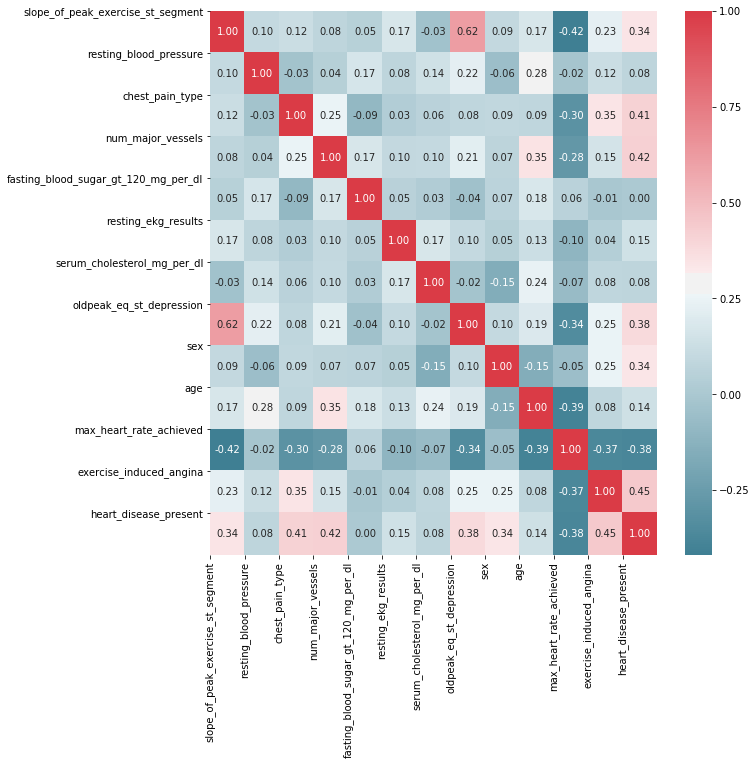

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corr = train.corr()
fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f')
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Looking at the above correlation plot, there is nothing that is *significantly* correlated with out target variable, `heart_disease_present`.  There is a correlation of `0.62` between `oldpeak_eq_st_depression` and `slope_of_peak_exercise_st_segment`, but unless it becomes problematic, I'm going to leave it for now.

# Data preparation
Let's now prepare the data for our machine learning model.  Firstly, we can remove the `patient_id` from the training data (this will be removed from testing before predictions).

In [6]:
train.drop('patient_id', axis=1, inplace=True)

We need to convert `thal` into a one-hot format as we cannot use strings!

In [7]:
train = pd.concat([train, pd.get_dummies(train.thal, drop_first=True, prefix='thal')], axis=1, sort=False)
train.drop('thal', axis=1, inplace=True)

test = pd.concat([test, pd.get_dummies(test.thal, drop_first=True, prefix='thal')], axis=1, sort=False)
test.drop('thal', axis=1, inplace=True)

In [8]:
features = train.drop('heart_disease_present', axis=1)
labels = train.heart_disease_present

# Model
Let's now create the model and tune it.

In [9]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_log_loss')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 120 is smaller than n_iter=200. Running 120 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Log Loss: -0.40614501313706536 / {'lr__solver': 'sag', 'lr__penalty': 'l2', 'lr__C': 0.10434482758620689}


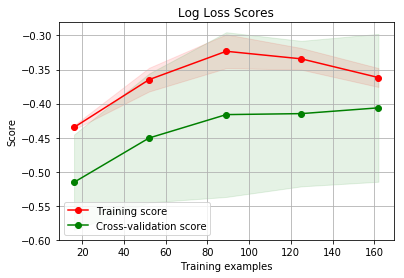

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# How we split the data.
kfold = StratifiedKFold(n_splits=10)

# Define the pipeline.
pl = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
    #('rf', RandomForestClassifier())
])

# Define the random search tuning.
param_grid = {
    #'rf__n_estimators': [200],
    #'rf__max_features': ['auto', 'sqrt'],
    #'rf__max_depth': [2, 4, 8, 16],
    #'rf__min_samples_split': [2, 3, 4, 5]
    'lr__C': np.linspace(0.001, 1.0, 30),
    'lr__penalty': ['l2'],
    'lr__solver': ['liblinear', 'sag', 'saga', 'lbfgs']
}
cv = RandomizedSearchCV(
    pl, param_grid, iid=False, cv=kfold, n_jobs=-1, random_state=42, scoring='neg_log_loss', n_iter=200
)

# Fit model and plot the learning curve.
cv.fit(features, labels)
print('Log Loss: {} / {}'.format(cv.best_score_, cv.best_params_))

plot_learning_curve(cv.best_estimator_, 'Log Loss Scores', features, labels, cv=kfold)
plt.show()

# Prediction
Let's quickly wrangle the test dataset and then predict the values and prepare for submission!

In [11]:
preds = cv.predict_proba(test.drop('patient_id', axis=1))
print(preds[:,1])

submission = pd.DataFrame({
    'patient_id': test.patient_id,
    'heart_disease_present': preds[:,1]
})
submission.to_csv('./submission/final.csv', index=False)

print('Done!')

[0.3363266  0.08639477 0.90191689 0.09091945 0.84846145 0.06656525
 0.12264177 0.92879208 0.18971677 0.16558935 0.38269883 0.59324766
 0.33850882 0.95904259 0.1282241  0.0367264  0.03468163 0.05786192
 0.88744587 0.09245276 0.93652922 0.19552121 0.14146145 0.02311502
 0.38827688 0.89201706 0.42695947 0.15538092 0.5737426  0.05788062
 0.83654139 0.24300731 0.65349728 0.38153694 0.12442464 0.07730354
 0.25439316 0.35960251 0.169682   0.072459   0.93821799 0.10226372
 0.85305334 0.05279276 0.89453431 0.12724114 0.10505772 0.20247504
 0.22400979 0.73490102 0.68550741 0.09273726 0.97387082 0.13256689
 0.4246076  0.06823408 0.91630566 0.14647469 0.33113667 0.65985695
 0.0770445  0.8995298  0.18294313 0.93246491 0.08721787 0.78416651
 0.69762914 0.54896914 0.72413265 0.70514526 0.1330363  0.96790415
 0.93384057 0.96824185 0.95264341 0.94559846 0.83155548 0.8141806
 0.2424879  0.70684954 0.53085361 0.04645116 0.43631138 0.73885584
 0.26783859 0.05060996 0.77281352 0.22890848 0.30643635 0.22820